In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
TEST_DATASET_SIZE = 10000

### Prepare data

In [31]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
X = np.concatenate((train_images,test_images))
Y = np.concatenate((train_labels,test_labels))
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=TEST_DATASET_SIZE, random_state=4)
train_images, test_images = train_images / 255.0, test_images / 255.0

### Fit model

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu' , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu' ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu' ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu' ))
model.add(layers.Dense(10))
model.compile(optimizer = 'adam' ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 1, batch_size = 64)

2021-12-14 07:11:10.271111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-14 07:11:10.271196: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2021-12-14 07:11:10.714167: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-14 07:11:10.838695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 1.6053 - accuracy: 0.4142

2021-12-14 07:11:19.808677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 10s 13ms/step - loss: 1.6053 - accuracy: 0.4142 - val_loss: 1.3287 - val_accuracy: 0.5237
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 1.2381 - accuracy: 0.5610 - val_loss: 1.2123 - val_accuracy: 0.5751
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 1.0798 - accuracy: 0.6203 - val_loss: 1.0440 - val_accuracy: 0.6295
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 0.9815 - accuracy: 0.6559 - val_loss: 0.9679 - val_accuracy: 0.6560
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.8999 - accuracy: 0.6845 - val_loss: 0.9271 - val_accuracy: 0.6753
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.8429 - accuracy: 0.7056 - val_loss: 0.9181 - val_accuracy: 0.6776
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.7892 - accuracy: 0.7219 - val_loss: 0.8628 - val_accuracy: 0.6958
Epoc

### Plot diagnostics

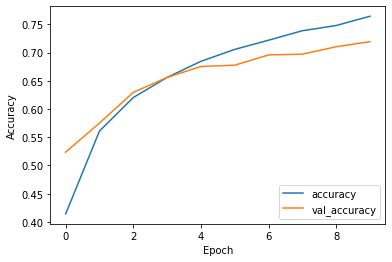

In [4]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### Evaluate model

In [5]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

313/313 - 1s - loss: 0.8166 - accuracy: 0.7193 - 1s/epoch - 5ms/step
Model accuracy:  0.7193000316619873


### Tests different hyperparameters

Epoch 1/10


2021-12-14 07:12:50.758303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:13:05.081281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 - 16s - loss: 2.0902 - accuracy: 0.2257 - val_loss: 1.8878 - val_accuracy: 0.3193 - 16s/epoch - 10ms/step
Epoch 2/10
1563/1563 - 15s - loss: 1.7323 - accuracy: 0.3737 - val_loss: 1.7173 - val_accuracy: 0.3954 - 15s/epoch - 10ms/step
Epoch 3/10
1563/1563 - 15s - loss: 1.4977 - accuracy: 0.4612 - val_loss: 1.4247 - val_accuracy: 0.4869 - 15s/epoch - 10ms/step
Epoch 4/10
1563/1563 - 15s - loss: 1.3698 - accuracy: 0.5101 - val_loss: 1.3158 - val_accuracy: 0.5346 - 15s/epoch - 10ms/step
Epoch 5/10
1563/1563 - 16s - loss: 1.2816 - accuracy: 0.5422 - val_loss: 1.2664 - val_accuracy: 0.5496 - 16s/epoch - 10ms/step
Epoch 6/10
1563/1563 - 16s - loss: 1.2061 - accuracy: 0.5728 - val_loss: 1.2574 - val_accuracy: 0.5503 - 16s/epoch - 10ms/step
Epoch 7/10
1563/1563 - 15s - loss: 1.1435 - accuracy: 0.5972 - val_loss: 1.1216 - val_accuracy: 0.6081 - 15s/epoch - 10ms/step
Epoch 8/10
1563/1563 - 16s - loss: 1.0891 - accuracy: 0.6185 - val_loss: 1.1798 - val_accuracy: 0.5892 - 16s/epoch - 10ms/

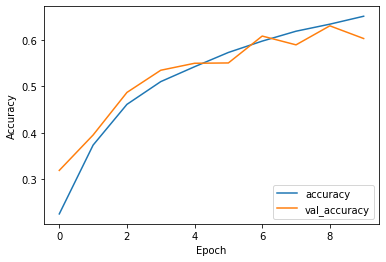

313/313 - 1s - loss: 1.1242 - accuracy: 0.6028 - 1s/epoch - 5ms/step
Model accuracy:  0.6028000116348267


In [6]:
A = "relu"
O = tf.keras.optimizers.SGD()
B = 32

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:15:27.525139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:15:35.254694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 - 9s - loss: 2.1442 - accuracy: 0.2167 - val_loss: 2.0016 - val_accuracy: 0.2574 - 9s/epoch - 11ms/step
Epoch 2/10
782/782 - 9s - loss: 1.8289 - accuracy: 0.3393 - val_loss: 1.8370 - val_accuracy: 0.3451 - 9s/epoch - 11ms/step
Epoch 3/10
782/782 - 9s - loss: 1.6186 - accuracy: 0.4192 - val_loss: 1.8800 - val_accuracy: 0.3341 - 9s/epoch - 11ms/step
Epoch 4/10
782/782 - 8s - loss: 1.4974 - accuracy: 0.4626 - val_loss: 1.5065 - val_accuracy: 0.4520 - 8s/epoch - 11ms/step
Epoch 5/10
782/782 - 8s - loss: 1.4098 - accuracy: 0.4944 - val_loss: 1.4720 - val_accuracy: 0.4811 - 8s/epoch - 11ms/step
Epoch 6/10
782/782 - 8s - loss: 1.3426 - accuracy: 0.5229 - val_loss: 1.4502 - val_accuracy: 0.4890 - 8s/epoch - 11ms/step
Epoch 7/10
782/782 - 8s - loss: 1.2879 - accuracy: 0.5422 - val_loss: 1.4061 - val_accuracy: 0.5117 - 8s/epoch - 10ms/step
Epoch 8/10
782/782 - 8s - loss: 1.2383 - accuracy: 0.5611 - val_loss: 1.2811 - val_accuracy: 0.5512 - 8s/epoch - 10ms/step
Epoch 9/10
782/782 - 8s - l

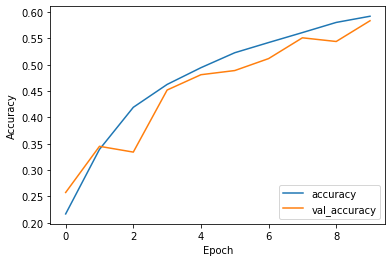

313/313 - 1s - loss: 1.1810 - accuracy: 0.5836 - 1s/epoch - 4ms/step
Model accuracy:  0.5836000442504883


In [7]:
A = "relu"
O = tf.keras.optimizers.SGD()
B = 64

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:16:53.424559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:16:58.958749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


391/391 - 6s - loss: 2.2865 - accuracy: 0.1270 - val_loss: 2.2586 - val_accuracy: 0.1558 - 6s/epoch - 16ms/step
Epoch 2/10
391/391 - 6s - loss: 2.1418 - accuracy: 0.2202 - val_loss: 2.0234 - val_accuracy: 0.2668 - 6s/epoch - 15ms/step
Epoch 3/10
391/391 - 6s - loss: 1.9807 - accuracy: 0.2817 - val_loss: 1.9287 - val_accuracy: 0.2962 - 6s/epoch - 15ms/step
Epoch 4/10
391/391 - 6s - loss: 1.8835 - accuracy: 0.3223 - val_loss: 1.8658 - val_accuracy: 0.3237 - 6s/epoch - 15ms/step
Epoch 5/10
391/391 - 6s - loss: 1.7807 - accuracy: 0.3639 - val_loss: 1.8971 - val_accuracy: 0.3253 - 6s/epoch - 15ms/step
Epoch 6/10
391/391 - 6s - loss: 1.6870 - accuracy: 0.3951 - val_loss: 1.6693 - val_accuracy: 0.4047 - 6s/epoch - 15ms/step
Epoch 7/10
391/391 - 6s - loss: 1.6036 - accuracy: 0.4281 - val_loss: 1.5575 - val_accuracy: 0.4462 - 6s/epoch - 15ms/step
Epoch 8/10
391/391 - 6s - loss: 1.5486 - accuracy: 0.4464 - val_loss: 1.5518 - val_accuracy: 0.4453 - 6s/epoch - 15ms/step
Epoch 9/10
391/391 - 6s - l

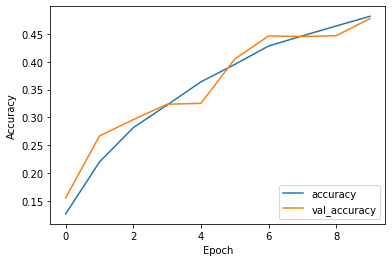

313/313 - 1s - loss: 1.4451 - accuracy: 0.4774 - 1s/epoch - 5ms/step
Model accuracy:  0.4774000346660614


In [8]:
A = "relu"
O = tf.keras.optimizers.SGD()
B = 128

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:17:54.607656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:18:09.360341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 - 16s - loss: 1.5025 - accuracy: 0.4505 - val_loss: 1.2446 - val_accuracy: 0.5522 - 16s/epoch - 10ms/step
Epoch 2/10
1563/1563 - 15s - loss: 1.1304 - accuracy: 0.6000 - val_loss: 1.0648 - val_accuracy: 0.6253 - 15s/epoch - 10ms/step
Epoch 3/10
1563/1563 - 15s - loss: 0.9861 - accuracy: 0.6543 - val_loss: 0.9938 - val_accuracy: 0.6575 - 15s/epoch - 10ms/step
Epoch 4/10
1563/1563 - 15s - loss: 0.8778 - accuracy: 0.6928 - val_loss: 0.9142 - val_accuracy: 0.6817 - 15s/epoch - 10ms/step
Epoch 5/10
1563/1563 - 15s - loss: 0.8111 - accuracy: 0.7190 - val_loss: 0.9126 - val_accuracy: 0.6978 - 15s/epoch - 10ms/step
Epoch 6/10
1563/1563 - 16s - loss: 0.7534 - accuracy: 0.7386 - val_loss: 0.8596 - val_accuracy: 0.7116 - 16s/epoch - 10ms/step
Epoch 7/10
1563/1563 - 16s - loss: 0.7007 - accuracy: 0.7556 - val_loss: 0.8404 - val_accuracy: 0.7196 - 16s/epoch - 10ms/step
Epoch 8/10
1563/1563 - 16s - loss: 0.6514 - accuracy: 0.7718 - val_loss: 0.8566 - val_accuracy: 0.7119 - 16s/epoch - 10ms/

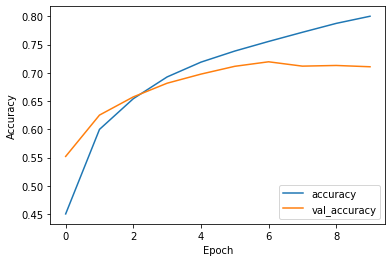

313/313 - 1s - loss: 0.8680 - accuracy: 0.7108 - 1s/epoch - 4ms/step
Model accuracy:  0.710800051689148


In [9]:
A = "relu"
O = tf.keras.optimizers.Adam()
B = 32

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:20:31.258875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:20:39.016093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 - 9s - loss: 1.6353 - accuracy: 0.4015 - val_loss: 1.3297 - val_accuracy: 0.5171 - 9s/epoch - 11ms/step
Epoch 2/10
782/782 - 9s - loss: 1.2605 - accuracy: 0.5507 - val_loss: 1.1607 - val_accuracy: 0.5852 - 9s/epoch - 11ms/step
Epoch 3/10
782/782 - 9s - loss: 1.1124 - accuracy: 0.6067 - val_loss: 1.0646 - val_accuracy: 0.6265 - 9s/epoch - 11ms/step
Epoch 4/10
782/782 - 9s - loss: 1.0186 - accuracy: 0.6431 - val_loss: 1.0220 - val_accuracy: 0.6432 - 9s/epoch - 11ms/step
Epoch 5/10
782/782 - 9s - loss: 0.9481 - accuracy: 0.6679 - val_loss: 0.9667 - val_accuracy: 0.6611 - 9s/epoch - 11ms/step
Epoch 6/10
782/782 - 8s - loss: 0.8841 - accuracy: 0.6919 - val_loss: 0.9513 - val_accuracy: 0.6720 - 8s/epoch - 11ms/step
Epoch 7/10
782/782 - 9s - loss: 0.8325 - accuracy: 0.7086 - val_loss: 0.8874 - val_accuracy: 0.6954 - 9s/epoch - 11ms/step
Epoch 8/10
782/782 - 9s - loss: 0.7904 - accuracy: 0.7246 - val_loss: 0.8958 - val_accuracy: 0.6974 - 9s/epoch - 11ms/step
Epoch 9/10
782/782 - 9s - l

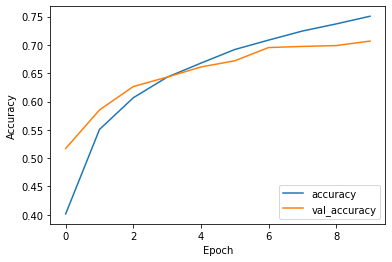

313/313 - 1s - loss: 0.8464 - accuracy: 0.7068 - 1s/epoch - 5ms/step
Model accuracy:  0.7068000435829163


In [10]:
A = "relu"
O = tf.keras.optimizers.Adam()
B = 64

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:34:14.826650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:34:20.666058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


391/391 - 7s - loss: 1.6419 - accuracy: 0.3977 - val_loss: 1.3750 - val_accuracy: 0.5074 - 7s/epoch - 17ms/step
Epoch 2/10
391/391 - 6s - loss: 1.2781 - accuracy: 0.5448 - val_loss: 1.1792 - val_accuracy: 0.5827 - 6s/epoch - 16ms/step
Epoch 3/10
391/391 - 6s - loss: 1.1321 - accuracy: 0.6001 - val_loss: 1.0847 - val_accuracy: 0.6200 - 6s/epoch - 16ms/step
Epoch 4/10
391/391 - 6s - loss: 1.0226 - accuracy: 0.6394 - val_loss: 1.0180 - val_accuracy: 0.6418 - 6s/epoch - 16ms/step
Epoch 5/10
391/391 - 6s - loss: 0.9558 - accuracy: 0.6645 - val_loss: 0.9542 - val_accuracy: 0.6691 - 6s/epoch - 16ms/step
Epoch 6/10
391/391 - 7s - loss: 0.8918 - accuracy: 0.6875 - val_loss: 0.9080 - val_accuracy: 0.6852 - 7s/epoch - 17ms/step
Epoch 7/10
391/391 - 6s - loss: 0.8468 - accuracy: 0.7059 - val_loss: 0.8964 - val_accuracy: 0.6824 - 6s/epoch - 15ms/step
Epoch 8/10
391/391 - 6s - loss: 0.8053 - accuracy: 0.7208 - val_loss: 0.8874 - val_accuracy: 0.6927 - 6s/epoch - 16ms/step
Epoch 9/10
391/391 - 7s - l

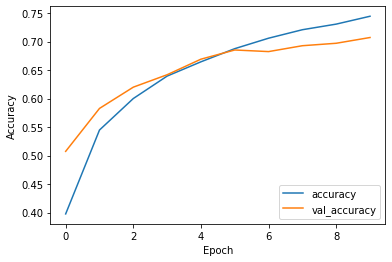

313/313 - 1s - loss: 0.8597 - accuracy: 0.7071 - 1s/epoch - 5ms/step
Model accuracy:  0.7071000337600708


In [17]:
A = "relu"
O = tf.keras.optimizers.Adam()
B = 128

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:23:04.334572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:23:19.579501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 - 18s - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.0970 - 18s/epoch - 11ms/step
Epoch 2/10
1563/1563 - 18s - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0983 - 18s/epoch - 12ms/step
Epoch 3/10
1563/1563 - 17s - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0993 - 17s/epoch - 11ms/step
Epoch 4/10
1563/1563 - 17s - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.0983 - 17s/epoch - 11ms/step
Epoch 5/10
1563/1563 - 18s - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0983 - 18s/epoch - 11ms/step
Epoch 6/10
1563/1563 - 18s - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0970 - 18s/epoch - 11ms/step
Epoch 7/10
1563/1563 - 17s - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.0996 - 17s/epoch - 11ms/step
Epoch 8/10
1563/1563 - 17s - loss: 2.3027 - accuracy: 0.0962 - val_loss: 2.3027 - val_accuracy: 0.0970 - 17s/epoch - 11ms/

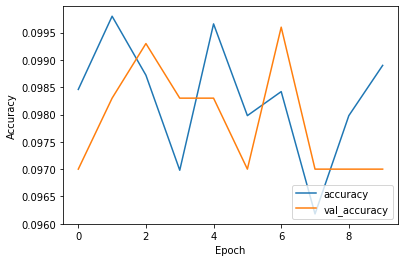

313/313 - 2s - loss: 2.3027 - accuracy: 0.0970 - 2s/epoch - 8ms/step
Model accuracy:  0.09700000286102295


In [12]:
A = "softmax"
O = tf.keras.optimizers.SGD()
B = 32

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:26:03.797553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:26:13.794818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 - 12s - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1017 - 12s/epoch - 15ms/step
Epoch 2/10
782/782 - 11s - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.0992 - 11s/epoch - 14ms/step
Epoch 3/10
782/782 - 10s - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.0970 - 10s/epoch - 13ms/step
Epoch 4/10
782/782 - 11s - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0970 - 11s/epoch - 14ms/step
Epoch 5/10
782/782 - 11s - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0991 - 11s/epoch - 14ms/step
Epoch 6/10
782/782 - 12s - loss: 2.3026 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.0970 - 12s/epoch - 15ms/step
Epoch 7/10
782/782 - 11s - loss: 2.3026 - accuracy: 0.0959 - val_loss: 2.3027 - val_accuracy: 0.0970 - 11s/epoch - 14ms/step
Epoch 8/10
782/782 - 12s - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.0970 - 12s/epoch - 15ms/step
Epoch 9/10


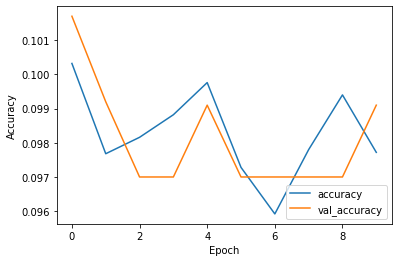

313/313 - 2s - loss: 2.3027 - accuracy: 0.0991 - 2s/epoch - 7ms/step
Model accuracy:  0.09910000115633011


In [13]:
A = "softmax"
O = tf.keras.optimizers.SGD()
B = 64

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:27:59.601907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:28:08.013254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


391/391 - 10s - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1017 - 10s/epoch - 27ms/step
Epoch 2/10
391/391 - 9s - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1008 - 9s/epoch - 23ms/step
Epoch 3/10
391/391 - 9s - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1008 - 9s/epoch - 22ms/step
Epoch 4/10
391/391 - 9s - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.0970 - 9s/epoch - 22ms/step
Epoch 5/10
391/391 - 9s - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.0970 - 9s/epoch - 23ms/step
Epoch 6/10
391/391 - 10s - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.0970 - 10s/epoch - 25ms/step
Epoch 7/10
391/391 - 9s - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.0970 - 9s/epoch - 23ms/step
Epoch 8/10
391/391 - 9s - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.0970 - 9s/epoch - 23ms/step
Epoch 9/10
391/391 - 9s

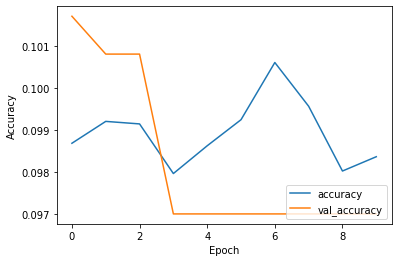

313/313 - 2s - loss: 2.3026 - accuracy: 0.0970 - 2s/epoch - 8ms/step
Model accuracy:  0.09700000286102295


In [14]:
A = "softmax"
O = tf.keras.optimizers.SGD()
B = 128

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:29:32.520300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:29:48.747100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 - 19s - loss: 2.2924 - accuracy: 0.1072 - val_loss: 2.1717 - val_accuracy: 0.1776 - 19s/epoch - 12ms/step
Epoch 2/10
1563/1563 - 18s - loss: 2.0809 - accuracy: 0.2140 - val_loss: 2.0518 - val_accuracy: 0.2212 - 18s/epoch - 12ms/step
Epoch 3/10
1563/1563 - 18s - loss: 2.0189 - accuracy: 0.2332 - val_loss: 1.9871 - val_accuracy: 0.2400 - 18s/epoch - 11ms/step
Epoch 4/10
1563/1563 - 18s - loss: 1.9673 - accuracy: 0.2504 - val_loss: 1.9573 - val_accuracy: 0.2522 - 18s/epoch - 12ms/step
Epoch 5/10
1563/1563 - 21s - loss: 1.9300 - accuracy: 0.2639 - val_loss: 1.9132 - val_accuracy: 0.2790 - 21s/epoch - 13ms/step
Epoch 6/10
1563/1563 - 19s - loss: 1.8747 - accuracy: 0.2913 - val_loss: 1.8487 - val_accuracy: 0.3054 - 19s/epoch - 12ms/step
Epoch 7/10
1563/1563 - 20s - loss: 1.8044 - accuracy: 0.3186 - val_loss: 1.7781 - val_accuracy: 0.3272 - 20s/epoch - 13ms/step
Epoch 8/10
1563/1563 - 19s - loss: 1.7450 - accuracy: 0.3394 - val_loss: 1.7276 - val_accuracy: 0.3455 - 19s/epoch - 12ms/

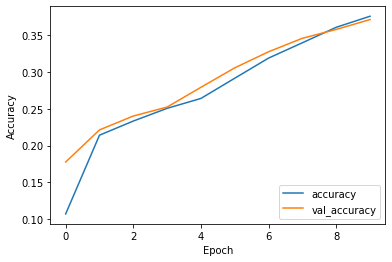

313/313 - 2s - loss: 1.6502 - accuracy: 0.3709 - 2s/epoch - 7ms/step
Model accuracy:  0.3709000051021576


In [15]:
A = "softmax"
O = tf.keras.optimizers.Adam()
B = 32

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:35:20.940002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:35:31.007499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 - 12s - loss: 2.3030 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0983 - 12s/epoch - 15ms/step
Epoch 2/10
782/782 - 11s - loss: 2.3029 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0993 - 11s/epoch - 14ms/step
Epoch 3/10
782/782 - 12s - loss: 2.2808 - accuracy: 0.1210 - val_loss: 2.1371 - val_accuracy: 0.2044 - 12s/epoch - 15ms/step
Epoch 4/10
782/782 - 11s - loss: 2.0715 - accuracy: 0.2200 - val_loss: 2.0533 - val_accuracy: 0.2207 - 11s/epoch - 14ms/step
Epoch 5/10
782/782 - 11s - loss: 2.0077 - accuracy: 0.2436 - val_loss: 1.9820 - val_accuracy: 0.2603 - 11s/epoch - 14ms/step
Epoch 6/10
782/782 - 11s - loss: 1.9572 - accuracy: 0.2694 - val_loss: 1.9392 - val_accuracy: 0.2769 - 11s/epoch - 14ms/step
Epoch 7/10
782/782 - 11s - loss: 1.9108 - accuracy: 0.2929 - val_loss: 1.8972 - val_accuracy: 0.3027 - 11s/epoch - 14ms/step
Epoch 8/10
782/782 - 11s - loss: 1.8637 - accuracy: 0.3135 - val_loss: 1.8371 - val_accuracy: 0.3182 - 11s/epoch - 14ms/step
Epoch 9/10


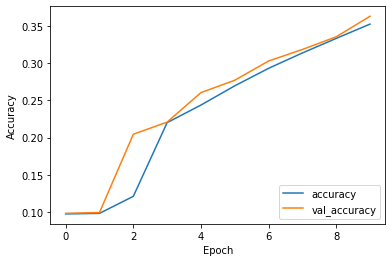

313/313 - 2s - loss: 1.7451 - accuracy: 0.3628 - 2s/epoch - 7ms/step
Model accuracy:  0.3628000319004059


In [18]:
A = "softmax"
O = tf.keras.optimizers.Adam()
B = 64

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

Epoch 1/10


2021-12-14 07:38:33.084345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:38:41.546270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


391/391 - 9s - loss: 2.3029 - accuracy: 0.0968 - val_loss: 2.3028 - val_accuracy: 0.0991 - 9s/epoch - 24ms/step
Epoch 2/10
391/391 - 9s - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1024 - 9s/epoch - 22ms/step
Epoch 3/10
391/391 - 9s - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.0983 - 9s/epoch - 22ms/step
Epoch 4/10
391/391 - 9s - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3028 - val_accuracy: 0.0996 - 9s/epoch - 22ms/step
Epoch 5/10
391/391 - 9s - loss: 2.2910 - accuracy: 0.1164 - val_loss: 2.1813 - val_accuracy: 0.1865 - 9s/epoch - 22ms/step
Epoch 6/10
391/391 - 9s - loss: 2.0961 - accuracy: 0.2121 - val_loss: 2.0678 - val_accuracy: 0.2179 - 9s/epoch - 22ms/step
Epoch 7/10
391/391 - 9s - loss: 2.0454 - accuracy: 0.2261 - val_loss: 2.0341 - val_accuracy: 0.2283 - 9s/epoch - 22ms/step
Epoch 8/10
391/391 - 9s - loss: 1.9985 - accuracy: 0.2400 - val_loss: 1.9905 - val_accuracy: 0.2504 - 9s/epoch - 22ms/step
Epoch 9/10
391/391 - 9s - l

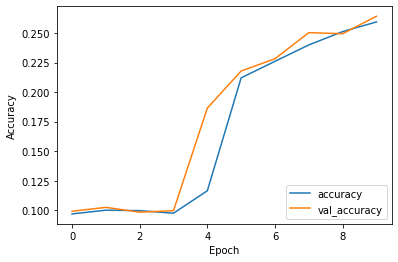

313/313 - 2s - loss: 1.9402 - accuracy: 0.2643 - 2s/epoch - 7ms/step
Model accuracy:  0.26430001854896545


In [19]:
A = "softmax"
O = tf.keras.optimizers.Adam()
B = 128

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=A , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=A ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=A ))
model.add(layers.Dense(10))
model.compile(optimizer = O ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = B)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Model accuracy: ", test_acc)

#### Best model: ADAM RELU 32 with accuracy 0.71

In [32]:
def get_n_test_data(n):
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    X = np.concatenate((train_images,test_images))
    Y = np.concatenate((train_labels,test_labels))
    train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=n, random_state=4)
    train_images, test_images = train_images / 255.0, test_images / 255.0
    return test_images, test_labels

In [33]:
x30, y30 = get_n_test_data(30)

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu" , input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu" ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu" ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu" ))
model.add(layers.Dense(10))
model.compile(optimizer = tf.keras.optimizers.Adam() ,
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), verbose = 2, batch_size = 32)

Epoch 1/10


2021-12-14 07:55:26.158784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-14 07:55:41.921180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 - 17s - loss: 1.5283 - accuracy: 0.4404 - val_loss: 1.3145 - val_accuracy: 0.5347 - 17s/epoch - 11ms/step
Epoch 2/10
1563/1563 - 16s - loss: 1.1866 - accuracy: 0.5783 - val_loss: 1.1306 - val_accuracy: 0.5993 - 16s/epoch - 10ms/step
Epoch 3/10
1563/1563 - 15s - loss: 1.0373 - accuracy: 0.6344 - val_loss: 1.0235 - val_accuracy: 0.6409 - 15s/epoch - 10ms/step
Epoch 4/10
1563/1563 - 16s - loss: 0.9438 - accuracy: 0.6696 - val_loss: 0.9453 - val_accuracy: 0.6714 - 16s/epoch - 10ms/step
Epoch 5/10
1563/1563 - 16s - loss: 0.8707 - accuracy: 0.6962 - val_loss: 0.9508 - val_accuracy: 0.6695 - 16s/epoch - 10ms/step
Epoch 6/10
1563/1563 - 16s - loss: 0.8092 - accuracy: 0.7162 - val_loss: 0.9917 - val_accuracy: 0.6602 - 16s/epoch - 10ms/step
Epoch 7/10
1563/1563 - 16s - loss: 0.7713 - accuracy: 0.7312 - val_loss: 0.8631 - val_accuracy: 0.7014 - 16s/epoch - 10ms/step
Epoch 8/10
1563/1563 - 16s - loss: 0.7245 - accuracy: 0.7476 - val_loss: 0.8956 - val_accuracy: 0.6961 - 16s/epoch - 10ms/

In [71]:
y_pred = model.predict(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=[np.argmax(i) for i in y_pred]).numpy()
con_mat

array([[767,  25,  47,  13,  15,   7,   7,  22,  99,  22],
       [ 21, 787,   5,  13,   3,   3,  21,   5,  46,  89],
       [ 69,   7, 645,  36,  44,  62,  68,  38,  17,   5],
       [ 24,   7,  59, 489,  26, 202,  81,  36,  36,  10],
       [ 39,   4,  97,  66, 567,  53,  55,  82,  12,   8],
       [ 12,   2,  53, 185,  22, 653,  30,  47,   9,   4],
       [  7,   9,  47,  62,  20,  19, 843,   9,   7,   3],
       [ 15,   3,  33,  42,  51,  66,  11, 738,  10,  23],
       [ 57,  34,  11,  16,   5,   4,   5,   3, 838,  23],
       [ 24,  74,   6,  20,   1,   9,   5,  10,  38, 821]], dtype=int32)

In [36]:
test_loss, test_acc = model.evaluate(x30,  y30)
print("Model accuracy: ", test_acc)

1/1 [==============================] - 0s 195ms/step - loss: 0.6619 - accuracy: 0.8667
Model accuracy:  0.8666667342185974


In [59]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i,j in zip(model.predict(x30, verbose=2), y30):
    pred = classes[np.argmax(i)] 
    fact = classes[j[0]]
    print(pred == fact, ": Predicted:", pred ," True:", fact)

1/1 - 0s - 14ms/epoch - 14ms/step
True : Predicted: deer  True: deer
True : Predicted: horse  True: horse
True : Predicted: bird  True: bird
False : Predicted: horse  True: deer
True : Predicted: truck  True: truck
True : Predicted: deer  True: deer
True : Predicted: deer  True: deer
True : Predicted: deer  True: deer
True : Predicted: airplane  True: airplane
True : Predicted: dog  True: dog
True : Predicted: deer  True: deer
True : Predicted: dog  True: dog
True : Predicted: automobile  True: automobile
False : Predicted: airplane  True: ship
True : Predicted: airplane  True: airplane
True : Predicted: automobile  True: automobile
True : Predicted: frog  True: frog
True : Predicted: truck  True: truck
True : Predicted: dog  True: dog
False : Predicted: cat  True: deer
True : Predicted: frog  True: frog
True : Predicted: ship  True: ship
True : Predicted: truck  True: truck
False : Predicted: airplane  True: cat
True : Predicted: horse  True: horse
True : Predicted: airplane  True: ai